In [1]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import ht,fluids,pint
import CoolProp as cp
from IPython.display import  Latex, Image
ureg = pint.UnitRegistry()
plt.rcParams["font.size"] = "20"

La Figura ilustra dos caños que se encuentran enterrados bajo una casa y que transfieren agua y calor desde y hacia una caldera. El tubo de la derecha transporta agua caliente a una temperatura $T_{a,c} = 60^\circ$C mientras que el de la izquierda lleva agua de la casa a la caldera a $T_{a,f} = 20^\circ$C. Ambos tubos tienen un diámetro exterior $D_0 = 0.75"$ y espesor 1.65mm y son de acero galvanizado. El coeficiente de transferencia por convección entre el agua y la pared interna de los caños puede estimarse $h_w = 250 $W/m$^2$K. La distancia entre centros de los caños es de 44.45mm y el largo de los mismos es $L = 6m$. La conductividad del suelo pueden considerarla $k_s=0.30$ W/mK.
    1. Estimar la transferencia de calor desde el agua caliente hacia el agua fría debida a la proximidad entre los tubos.
    2. Para realizar el punto anterior, debe haberse determinado un factor de forma. Intente encontrar una solución aproximada y compárela. (Puede pensar en un método gráfico o uno que pueda justificar como una aproximación de orden de magnitud razonable).
    3. Realizar un gráfico de la transferencia de calor como una función de la distancia entre centros de los tubos.


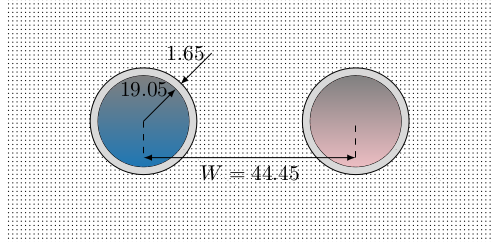

In [2]:
#!Image('/home/juan/Documents/Ensenanza/latex/ejercicios_tp/caños.png')
Image(filename= "/home/juan/Documents/Ensenanza/latex/ejercicios_tp/caños.png", width=700, height=100)

In [3]:
Ta_f = (20 + 273)*ureg.K
Ta_c = (60+273)*ureg.K
Do = (0.75*25.4e-3)*ureg.m
esp = 1.65e-3*ureg.m
Di = Do-2*esp
dist_c = 44.45e-3*ureg.m
L_c = 6*ureg.m
k_s = 0.30*ureg.watt/ureg.K/ureg.m
acero_galvanizado = ht.nearest_material('galvanized steel')
k_acerog = ht.k_material(acero_galvanizado)*ureg.watt/ureg.K/ureg.m
h_w = 250*ureg.watt/ureg.m**2/ureg.K


In [4]:
k_acerog

17.0 <Unit('watt / kelvin / meter')>

Factor de Forma

$$S = \frac{2\pi L}{\cosh^{-1}\left(\frac{4w^2-D_1^2-D_2^2}{2D_1D_2}\right)}$$

In [5]:
S = ht.conduction.S_isothermal_pipe_to_isothermal_pipe(Do, Do, dist_c, L_c)
R_T_suelo = 1/(k_s*S)
R_T_conveccion = 1 / (h_w*np.pi*L_c*Di)
R_T_cond_metal = (k_acerog * np.pi*2*L_c/np.log(Do/Di))**-1


In [6]:
display(Latex(f'Resistencia térmica metal: {R_T_cond_metal:~.2e}'))
display(Latex(f'Resistencia térmica suelo: {R_T_suelo:~.2f}'))
display(Latex(f'Resistencia térmica convección: {R_T_conveccion:~.2f}'))

R_T_total = 2*(R_T_cond_metal+R_T_conveccion)+R_T_suelo
display(Latex(f'Resistencia térmica total: {R_T_total:~.2f}'))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [7]:
Q = (Ta_c-Ta_f)/R_T_total
display (Latex(f"Calor transferido, $\dot Q ={Q:~.2f}$"))

<IPython.core.display.Latex object>

In [8]:
#Aproximacion de S

S_approx = Do*L_c / (dist_c-Do)
display(Latex(f'S aproximado: {S_approx:~.2f}'))
display(Latex(f'S calculado: {S:~.2f}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [9]:
def resist_termica(dist_c_i):
    S = ht.conduction.S_isothermal_pipe_to_isothermal_pipe(Do, Do, dist_c_i, L_c)
    R_T_suelo = 1/(k_s*S)
    R_T_conveccion = 1 / (h_w*np.pi*L_c*Di)
    R_T_cond_metal = (k_acerog * np.pi*2*L_c/np.log(Do/Di))**-1
    R_T_total = 2*(R_T_cond_metal+R_T_conveccion)+R_T_suelo
    return R_T_total

In [10]:
def resist_termica(dist_c):
    S = ht.conduction.S_isothermal_pipe_to_isothermal_pipe(Do, Do, dist_c, L_c)
    R_T_suelo = 1/(k_s*S)
    R_T_conveccion = 1 / (h_w*np.pi*L_c*Di)
    R_T_cond_metal = (k_acerog * np.pi*2*L_c/np.log(Do/Di))**-1
    R_T_total = 2*(R_T_cond_metal+R_T_conveccion)+R_T_suelo
    return R_T_total

In [11]:
#Gráfico en funcion de dist_c
distancias = np.linspace(1.5*Do,10*Do,50)
Q_i0 = Q
Q_i = np.zeros_like(distancias)*ureg.watt
for i,dist_c_i in enumerate(distancias):
    R_t = resist_termica(dist_c_i)
    Q_i[i] = (Ta_c-Ta_f)/R_t    

In [12]:
fig0,ax0 = plt.subplots(figsize=(7,7))
ax0.plot(distancias.magnitude/Do.magnitude,Q_i.magnitude/Q_i0.magnitude,'s-',markerfacecolor='None',markersize=10);
ax0.set_xlabel('$dist_C / D_o$',fontsize=20);
ax0.set_ylabel('$Q / Q_0$',fontsize=20);

In [15]:
fig0,ax0 = plt.subplots(figsize=(5,5))
xs = distancias.magnitude/Do.magnitude
y1 = Q_i.magnitude/Q_i0.magnitude
ax0.plot(xs,y1,'s',markerfacecolor='None',markersize=10,linestyle= '',label='sol 1');
ax0.plot(xs[::2],1.65-xs[::2]*0.115,markerfacecolor='None',linestyle='',marker='o',label='sol 2')
ax0.set_xlabel('$W / D_o$',fontsize=20);
ax0.set_ylabel('$Q / Q_0$',fontsize=20);
ax0.legend()
fig0.tight_layout();
plt.savefig('/home/juan/Documents/Ensenanza/latex/ejercicios_tp/caños_plot.png')